# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:
- Найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

 
**Таким образом, исследование пройдёт в несколько этапов:**
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых столбцов.
 4. Исследование данных на наличие зависимостей разных факторов друг от друга

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

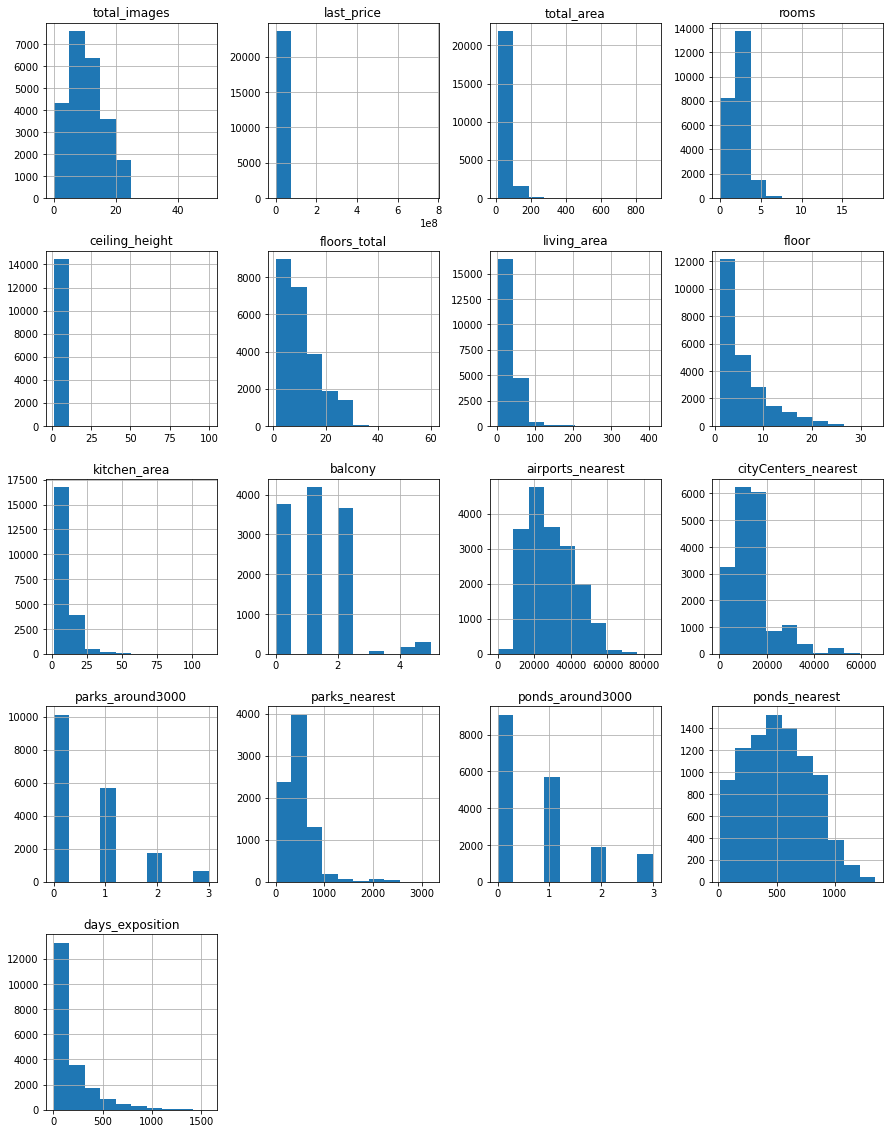

In [3]:
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))
plt.show();


### Предобработка данных

#### Удаление пропусков

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**В многих столбцах есть пропущенные значения.** Рассмотрим каждый из них:

ceiling_height - высота потолков. Можно заполнить пропуски средним значением высот потолков по России.  (https://stroypodskazka.com/norma-vysoty-potolka-dlya-zhilogo-doma/)

floors_total - всего этажей в доме. Пропуски в этом столбце можно заполнить этажом квартиры с пропуском. 

living_area - жилая площадь в квадратных метрах. Заполним медианным значением. 

is_apartment. заменим на 0

kitchen_area - площадь кухни заменим медианным значением

balcony - если количество балконов не указали, то скорее всего их нет в квартире, заменим на 0

locality_name - название населённого пункта. Ничем не заполнить, удалим эти строчки с пропусками, их не очень много.

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest - картографические данные, заполнить можно только примерно, поэтому оставим пропуски

days_exposition - в таких объявлениях нет даты снятия, ничем заполнить нельзя, поэтому оставляем пропуски


**Создадим функцию, которая будет высчитывать медианные значения столбца**

In [6]:
def fillna_median(parametr):
    data[parametr] = data[parametr].fillna(data[parametr].median())
    mediana = data[parametr]
    return mediana

**Создадим функцию, которая заменяет пропущенные значения на заданное число**

In [7]:
def fillna_number(parametr, number):
    data[parametr] = data[parametr].fillna(number)
    fillna = data[parametr]
    return fillna

Средняя высота потолков в России - 2,6 м 
Источник: https://stroypodskazka.com/norma-vysoty-potolka-dlya-zhilogo-doma/


In [8]:
def fillna_ceil(parametr):
    data[parametr] = data[parametr].fillna(2.5)
    fillna = data[parametr]
    return fillna

**Обработаем столбцы, пропущенные значения в которых стоит заменить на медианное значение**

In [9]:
fillna_median('living_area')

0        51.0
1        18.6
2        34.3
3        30.0
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697    30.0
23698    12.3
Name: living_area, Length: 23699, dtype: float64

In [10]:
fillna_median('kitchen_area')

0        25.00
1        11.00
2         8.30
3         9.10
4        41.00
         ...  
23694    13.83
23695     8.50
23696     9.10
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

**Обработаем столбцы, пропущенные значения в которых стоит заменить на заданное число**

In [11]:
fillna_number('is_apartment', 0)

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: is_apartment, Length: 23699, dtype: object

In [12]:
fillna_number('balcony', 0)

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23699, dtype: float64

In [13]:
fillna_number('ceiling_height', 2.6)

0        2.70
1        2.60
2        2.60
3        2.60
4        3.03
         ... 
23694    3.70
23695    2.60
23696    2.60
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

**Обработка пропусков в floors_total**

In [14]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

**Обработка пропусков в locality_name**

In [15]:
data = data.dropna(subset=['locality_name'])

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Изменение типов данных

Тип столбца 'is_apartment' должен быть bool, а не object

In [17]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Этажей и балконов явно целое число. Цена тоже должна быть целым чилом. 

In [18]:
data['floors_total'] = data['floors_total'].astype(int)
data['floor'] = data['floor'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['last_price'] = data['last_price'].astype(int)

Переведем дату и время в столбце first_day_exposition

In [19]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

#### Обработка неявных дубликатов

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить, что среди названий населенных пунктов много неявных дубликатов. Например, 'посёлок Мурино' и 'поселок Мурино', 'деревня Кудрово' и 'Кудрово'


Надо заменить "ё" на "е", чтобы не путаться. Напишем функцию и создадим новый столбец для обработанных названий.

In [21]:
def yo_to_e(row):
        if 'ё' in row:
            return row.replace('ё', 'е')
        else:
            return row

In [22]:
data['locality_name_with_e'] = data['locality_name'].apply(yo_to_e)

Создадим функцию, которая оставит только название населенного пункта без указания его типа. Также создадим новый столбец.

In [23]:
def categorize_name(row):
        if 'поселок городского типа ' in row:
            return row.replace('поселок городского типа ', '')
        elif 'городской поселок ' in row:
            return row.replace('городской поселок ', '')
        elif 'садоводческое некоммерческое товарищество ' in row:
            return row.replace('садоводческое некоммерческое товарищество ', '')
        elif 'поселок при железнодорожной станции ' in row:
            return row.replace('поселок при железнодорожной станции ', '')
        elif 'поселок станции ' in row:
            return row.replace('поселок станции ', '')
        elif 'садовое товарищество ' in row:
            return row.replace('садовое товарищество ', '')
        elif 'поселок городского типа ' in row:
            return row.replace('поселок городского типа ', '')
        elif 'коттеджный поселок ' in row:
            return row.replace('коттеджный поселок ', '')
        elif 'деревня ' in row:
            return row.replace('деревня ', '')
        elif 'село ' in row:
            return row.replace('село ', '')
        elif 'поселок ' in row:
            return row.replace('поселок ', '')
        else:
            return row
        

In [24]:
data['name_category'] = data['locality_name_with_e'].apply(categorize_name)

In [25]:
data['name_category'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Обработка аномальных значений

Выведем уникальные значения всех столбцов

In [26]:
for column in range(0,22):
    print(data.columns[column], data.iloc[:, column].unique())

total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price [13000000  3350000  5196000 ...  6151120 21400000 11475000]
total_area [108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition ['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000']
rooms [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height [  2.7    2.6    3.03   2.5    2.67   2.56   3.05   2.75   2.9    2.8
   2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3 

Столбец с аномальными значениями: ceiling_height.
Потолки выше 10 м вряд ли существуют, поэтому удалим такие объявления
В значениях 25, 26 и тд, очевидно, допустили опечатку

In [27]:
data['ceiling_height'] = data['ceiling_height'].where((data['ceiling_height'] < 20), data['ceiling_height']/10)
data['ceiling_height'].unique()
    

array([ 2.7 ,  2.6 ,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

<AxesSubplot:>

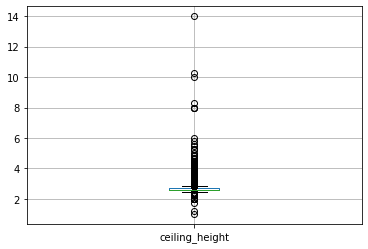

In [28]:
data[['ceiling_height']].boxplot()

На диаграмме видно, что есть странные выбросы выше 6. 

Удалим значения больше 6 м

In [29]:
data = data[data['ceiling_height'] < 7]

<AxesSubplot:>

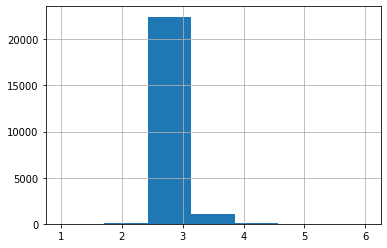

In [30]:
data['ceiling_height'].hist(bins=7)

Аномальных значений больше нет

In [31]:
data[['locality_name','floors_total']].sort_values('floors_total', ascending=False)

,locality_name,floors_total
2253,Кронштадт,60
16731,Санкт-Петербург,52
16934,Санкт-Петербург,37
11079,Санкт-Петербург,36
5807,Санкт-Петербург,36
...,...,...
17744,посёлок Суйда,1
15543,городской поселок Большая Ижора,1
3076,Волосово,1
237,Санкт-Петербург,1


В Кронштадте нет 60 этажных зданий

In [32]:
data = data.query('index not in [2253]')

Аномалии цены уберу позже

#### Обработка явных дубликатов

In [33]:
data.duplicated().sum()

0

Повторяющихся объявлений нет. Это хорошо.

Вывод о качестве данных: данные достаточно качественные, в основных показателях, которые особенно потребуются для анализа пропусков нет. Кроме этого, данные приближены к реальности, а аномальные значения встречаются редко

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с ценой одного квадратного метра, для этого цену поделим на площадь

In [34]:
data['meter_price'] = data['last_price']/data['total_area']

In [35]:
data['meter_price']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: meter_price, Length: 23642, dtype: float64

Добавим новый столбец с днем публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [36]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23642, dtype: int64

Добавим новый столбец с месяцем публикации

In [37]:
data['month_year'] = data['first_day_exposition'].astype('datetime64[M]')
data['month_year']

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2015-07-01
4       2018-06-01
           ...    
23694   2017-03-01
23695   2018-01-01
23696   2018-02-01
23697   2017-03-01
23698   2017-07-01
Name: month_year, Length: 23642, dtype: datetime64[ns]

In [38]:
data['month'] = data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23642, dtype: int64

Добавим новый столбец с годом публикации

In [39]:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23642, dtype: int64

Добавим новый столбец с типом этажа квартиры

In [40]:
def type_floor(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другое'

In [41]:
data['type_floor'] = data.apply(type_floor, axis=1)
data['type_floor']

0        другое
1        первый
2        другое
3        другое
4        другое
          ...  
23694    другое
23695    другое
23696    первый
23697    другое
23698    первый
Name: type_floor, Length: 23642, dtype: object

Добавим новый столбец с расстоянием в км до центра города

In [42]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23642, dtype: float64

### Проведите исследовательский анализ данных

In [43]:
data['total_area'].describe()

count    23642.000000
mean        60.333922
std         35.666087
min         12.000000
25%         40.000000
50%         52.000000
75%         69.732500
max        900.000000
Name: total_area, dtype: float64

Медиана и среднее значение в столбце с общей площадью примерно одинаковые. Выбросов, сильно влияющих на среднее значение нет

<AxesSubplot:>

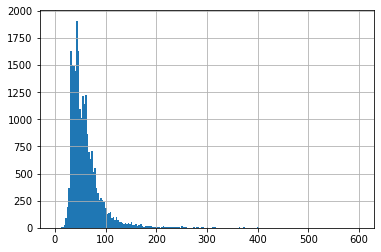

In [44]:
data['total_area'].hist(range=(0,600), bins=200)

<AxesSubplot:>

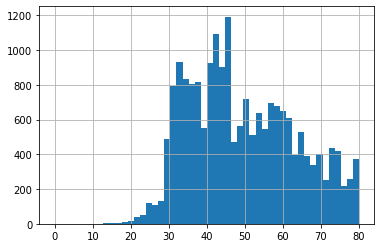

In [45]:
data['total_area'].hist(range=(0,80), bins=50)

Чаще всего встречаются квартиры с площадью 45 м. Распределение Пуассона можно считать симметричным и оно стремится к нормальному

In [46]:
data['living_area'].describe()

count    23642.000000
mean        34.094693
std         21.171499
min          2.000000
25%         19.000000
50%         30.000000
75%         41.075000
max        409.700000
Name: living_area, dtype: float64

Медиана и среднее значение в столбце с жилой площадью примерно одинаковые. Выбросов, сильно влияющих на среднее значение нет

<AxesSubplot:>

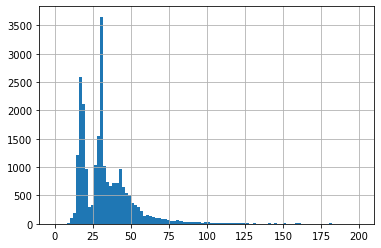

In [47]:
data['living_area'].hist(range=(0,200), bins=100)

<AxesSubplot:>

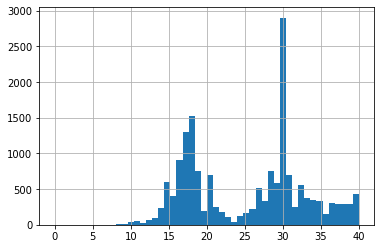

In [48]:
data['living_area'].hist(range=(0,40), bins=50)

На гистограмме видно, объявлений с какой жилой площадью больше. Видно два пика: 17 м и 30 м, а между ними провал значениц, это может быть связано с тем, что количество комнат разное. Однокомнатные квартиры обычно 17 м, а двухкомнатные - 30.

In [49]:
data['kitchen_area'].describe()

count    23642.000000
mean        10.426312
std          5.628909
min          1.300000
25%          7.300000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

Медиана и среднее значение в столбце с площадью кухни примерно одинаковые. Выбросов, сильно влияющих на среднее значение нет

<AxesSubplot:>

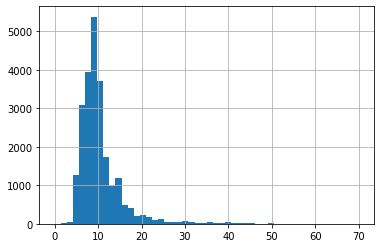

In [50]:
data['kitchen_area'].hist(range=(0,70), bins=50)

На гистограмме видно, объявлений с какой кухонной площадью больше. Распределение Пуассона можно считать симметричным и оно стремится к нормальному. Чаще всего площадь кухни 9 м

In [51]:
pd.set_option('display.float_format', lambda x: '%.3f'%x)
data['last_price'].describe()

count       23642.000
mean      6541322.694
std      10898027.204
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6799000.000
max     763000000.000
Name: last_price, dtype: float64

Медиана и среднее значение в столбце с площадью кухни различаются. Есть объявления с особенно высокими ценами, которые влияют на среднее значение. 

<AxesSubplot:>

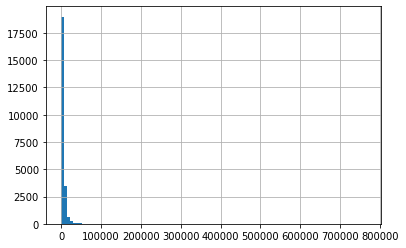

In [52]:
#data.plot(kind='hist', y='last_price', grid=True, range=(0,763000000))
(data['last_price']/1000).hist(range=(0,763000), bins=100)

Посмотрим ближе

<AxesSubplot:>

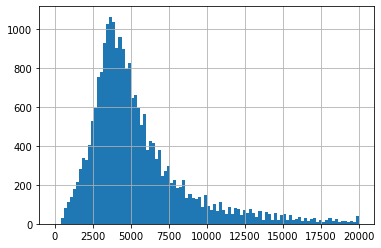

In [53]:
(data['last_price']/1000).hist(range=(0,20000), bins=100)

Уберем выбросы, чтобы медиана и среднее значение приблизились

<AxesSubplot:>

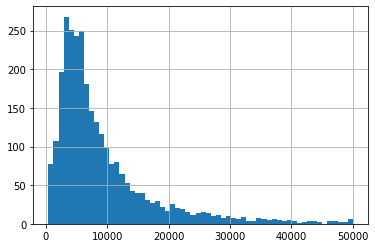

In [54]:
data['sorted_price_big'] = data['last_price'] > 50000000
data['sorted_price_smoll'] = data['last_price'] < 100000
data['sorted_price_big'] = data['sorted_price_big'].astype(int)
data['sorted_price_smoll'] = data['sorted_price_smoll'].astype(int)
data['summa'] = data['sorted_price_big'] + data['sorted_price_smoll']
sorted_price_stat_bool = data.pivot_table(index='last_price', values='summa')
sorted_price_stat = sorted_price_stat_bool.query('summa == 0')
sorted_price_stat = sorted_price_stat.rename_axis('last_price').reset_index()
(sorted_price_stat['last_price']/1000).hist(bins=60)


In [55]:
sorted_price_stat['last_price'].describe()

count       2862.000
mean     9128288.610
std      8141889.294
min       430000.000
25%      3960582.000
50%      6333985.000
75%     11206523.000
max     50000000.000
Name: last_price, dtype: float64

На гистограмме видно, объявлений с какой ценой больше. Распределение Пуассона можно считать симметричным и оно стремится к нормальному. Больше всего объявлений с ценой около 4 млн.

In [56]:
data['rooms'].describe()

count   23642.000
mean        2.070
std         1.079
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

Медиана и среднее значение в столбце с количеством комнат одинаковые.

<AxesSubplot:>

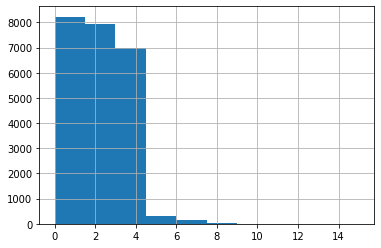

In [57]:
data['rooms'].hist(range=(0,15))

Больше всего объявлений с 0-4 комнат

In [58]:
data['ceiling_height'].describe()

count   23642.000
mean        2.677
std         0.227
min         1.000
25%         2.600
50%         2.600
75%         2.700
max         6.000
Name: ceiling_height, dtype: float64

Медиана и среднее значение в столбце с высотой потолков одинаковые.

<AxesSubplot:ylabel='Frequency'>

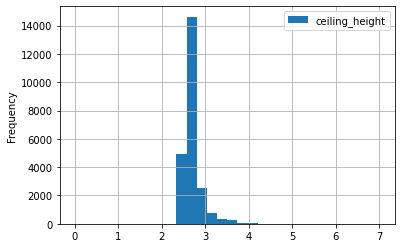

In [59]:
data.plot(kind='hist', y='ceiling_height', grid=True, range=(0,7), bins=30)

На гистограмме видно, объявлений с какой высотой потолков больше (2-3 м ). Распределение Пуассона можно считать симметричным и оно стремится к нормальному. 

In [60]:
data['floor'].describe()

count   23642.000
mean        5.893
std         4.883
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

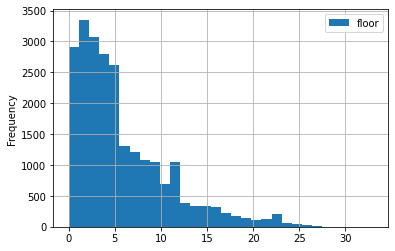

In [61]:
data.plot(kind='hist', y='floor', grid=True, range=(0,33), bins=30)

Объявления с нижними этажами встречаются чаще

In [62]:
data['type_floor'].value_counts()

другое       17320
последний     3411
первый        2911
Name: type_floor, dtype: int64

<AxesSubplot:>

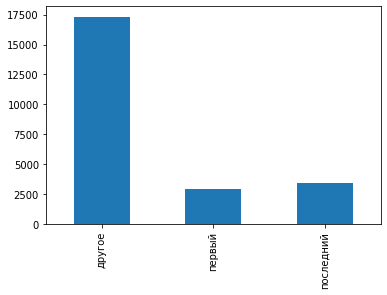

In [63]:
data['type_floor'].value_counts().sort_index(ascending=True).plot.bar()

Объявлений с последним этажом больше чем с последним.

In [64]:
data['floors_total'].describe()

count   23642.000
mean       10.672
std         6.586
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        52.000
Name: floors_total, dtype: float64

Медиана и среднее значение примерно одинаковые.

<AxesSubplot:ylabel='Frequency'>

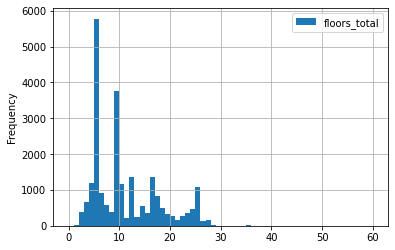

In [65]:
data.plot(kind='hist', y='floors_total', grid=True, range=(0,60), bins=60)

<AxesSubplot:ylabel='Frequency'>

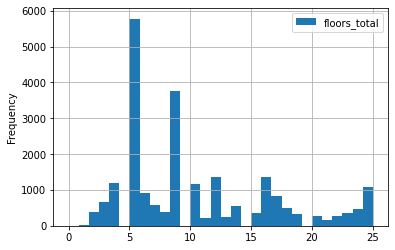

In [66]:
data.plot(kind='hist', y='floors_total', grid=True, range=(0,25), bins=30)

На гистограмме есть много пиков 5, 9. распределения Пуассона нет. Это связано с тем, что в Советском Союзе строили дома высотой в основном 5 и 9 этажей (https://realty.rbc.ru/news/5d8daf469a79474f328b22bd)

In [67]:
data['cityCenters_nearest'].describe()

count   18132.000
mean    14195.997
std      8603.685
min       181.000
25%      9241.000
50%     13106.000
75%     16293.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

Медиана и среднее значение примерно одинаковые. Выбросов, сильно влияющих на среднее значение нет

<AxesSubplot:ylabel='Frequency'>

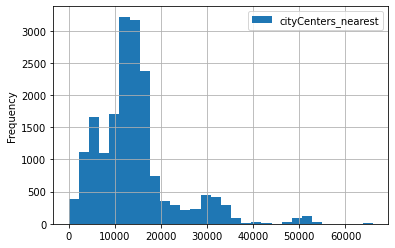

In [68]:
data.plot(kind='hist', y='cityCenters_nearest', grid=True, range=(0,65968), bins=30)

Чаще всего встречаются квартиры с отдаленностью от центра города в 10-20 км. Распределение Пуассона можно считать симметричным и оно стремится к нормальному

In [69]:
data['airports_nearest'].describe()

count   18109.000
mean    28801.974
std     12635.193
min         0.000
25%     18576.000
50%     26756.000
75%     37294.000
max     84869.000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

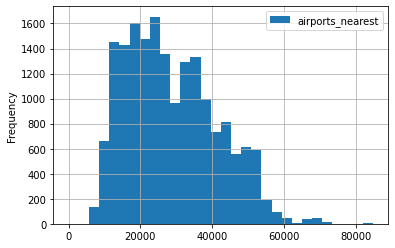

In [70]:
data.plot(kind='hist', y='airports_nearest', grid=True, range=(0,84869), bins=30)

 Распределение Пуассона можно считать симметричным и оно стремится к нормальному

In [71]:
data['parks_nearest'].describe()

count   8060.000
mean     490.860
std      342.612
min        1.000
25%      288.000
50%      455.000
75%      612.000
max     3190.000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

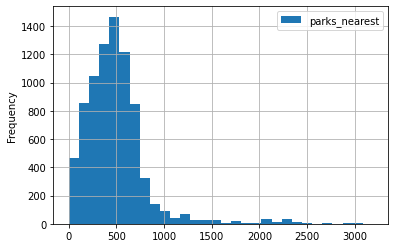

In [72]:
data.plot(kind='hist', y='parks_nearest', grid=True, range=(0,3190), bins=30)

Распределение Пуассона можно считать симметричным и оно стремится к нормальному. Чаще всего ближайший парк в 500 м от квартиры

<AxesSubplot:>

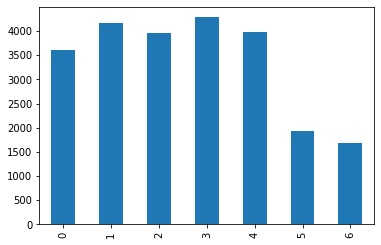

In [73]:
data['weekday'].value_counts().sort_index(ascending=True).plot.bar()

В выходные реже всего выкладывают объявления

<AxesSubplot:>

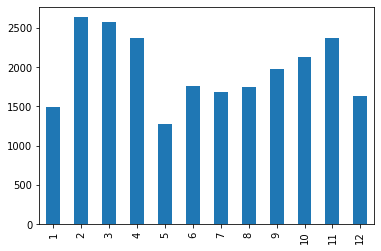

In [74]:
data['month'].value_counts().sort_index(ascending=True).plot.bar()

Больше всего объявления выкладывают в феврале, а реже - в мае.

**Изучим как быстро продавались квартиры (столбец days_exposition)**

In [75]:
data['days_exposition'].describe()

count   20462.000
mean      180.740
std       219.793
min         1.000
25%        45.000
50%        95.000
75%       231.000
max      1580.000
Name: days_exposition, dtype: float64

Медианное значение в 2 раза меньше среднего. Значит есть особенно "долгие" объявления. 

In [76]:
data['days_exposition'].value_counts()

45.000      879
60.000      538
7.000       234
30.000      208
90.000      203
           ... 
969.000       1
1.000         1
1147.000      1
1148.000      1
1174.000      1
Name: days_exposition, Length: 1141, dtype: int64

Чаще всего объявления снимаются через 7, 30, 45, 90 дней после публикации. Это потому что объявления автоматически снимаются без продлевания.

<AxesSubplot:ylabel='Frequency'>

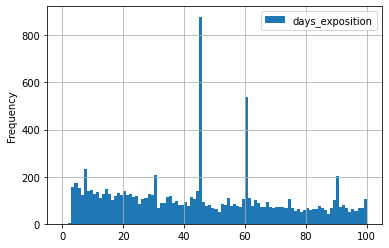

In [77]:
data.plot(kind='hist', y='days_exposition', grid=True, range=(0,100), bins=100)

In [78]:
def categorize_days_exposition(income):
    try:
        if 0 <= income <= 30:
            return 'до месяца'
        elif 31 <= income <= 44:
            return 'от месяца до полтора месяца'
        elif 45 <= income <= 89:
            return 'от полтора до 3-х месяцев'
        elif 90 <= income <= 180:
            return 'от 3-х месяцев до полугода'
        elif 181 <= income <= 365:
            return 'от полугода до года'
        elif 366 <= income <= 730:
            return 'от года до двух'
        elif 731 <= income <= 1095:
            return 'от двух лет до трех'
        elif income >= 1096:
            return 'больше трех лет'
    except:
        pass

In [79]:
data['categorize_days_exposition'] = data['days_exposition'].apply(categorize_days_exposition)

<AxesSubplot:>

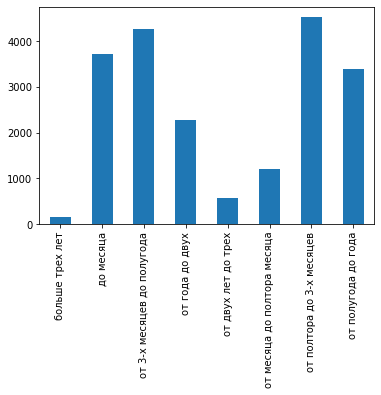

In [80]:
data['categorize_days_exposition'].value_counts().sort_index(ascending=True).plot.bar()

Обычно продажи составляют от полтора месяца до 3-х месяцев. Чаще всего 45 и 60 дней. Реже всего от месяца до полумесяца. Среди объявлений, снятых с публикации раньше, чем через месяц, чаще всего встречаются объявления, провисевшие на сайте всего 7 дней.
Есть объявления, которые были размещены на сайте больше 3-х лет.

**Узнаем какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [81]:
data['last_price_in_billion'] = data['last_price']/1000000

0.6537950076075449

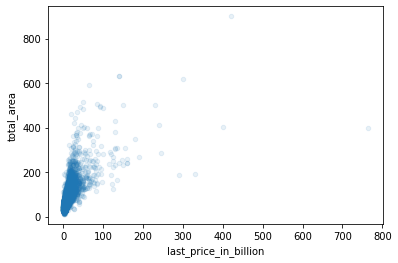

In [82]:
data.plot(x='last_price_in_billion', y='total_area', kind='scatter', alpha=0.1) 
data['last_price_in_billion'].corr(data['total_area'])

Корреляция Пирсона 0.65, это говориит о достаточно силиной связи между показателями

На таком графике из-за выбросов ничего не понятно, посмотрим на диаграмму без аномальных значений

In [83]:
sorted_price_stat['last_price'] = sorted_price_stat['last_price']/1000
data['last_price'] = data['last_price']/1000

0.6537950076075452

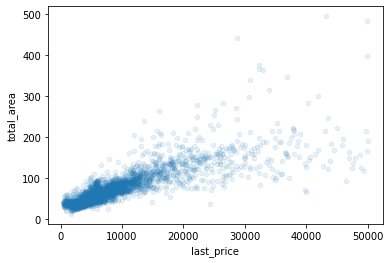

In [84]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='total_area')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
data['last_price'].corr(data['total_area'])

Корреляция высокая, почти 0.7. Чем площадь больше, тем цена больше

0.5407494356441164

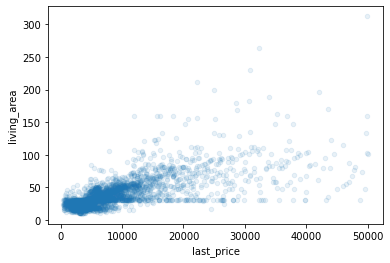

In [85]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='living_area')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
data['last_price'].corr(data['living_area'])

Корреляция 0.54 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение площади сопровождается прибавкой в цене, но так бывает не всегда.

0.44059502731089323

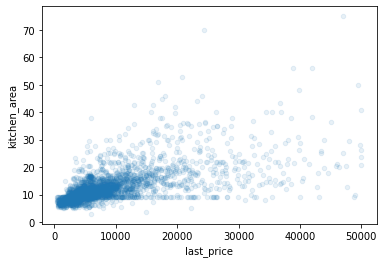

In [86]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='kitchen_area')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)
data['last_price'].corr(data['kitchen_area'])

Корреляция 0.44, это достаточно низкая связь, но все равно она есть. Чем площадь кухни больше, тем цена больше, но так случается не во всех случаях(зависит от других факторов, например, удаленость от центра).

0.3634703580456191

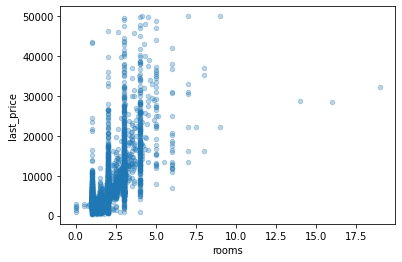

In [87]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='rooms')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
data['last_price'].corr(data['rooms'])

Корреляция всего 0.36, это говорит о достаточно низкой зависимости. Количество комнат практически не влияет на цену

<AxesSubplot:xlabel='type_floor'>

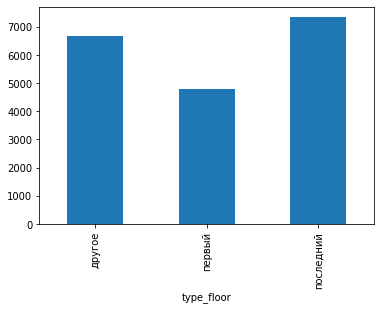

In [88]:
data.groupby('type_floor')['last_price'].mean().plot.bar()

Квартиры на последних этажах дороже, тк они с красивым видом

0.00164326464346708

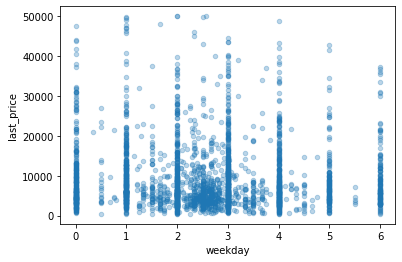

In [89]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='weekday')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='weekday', y='last_price', kind='scatter', alpha=0.3)
data['last_price'].corr(data['weekday'])

Корреляция всего 0,002. Цена квартиры не зависит от дня недели, в который объявление было выложено

0.002722987871994228

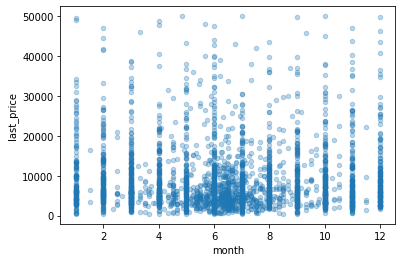

In [90]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='month')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='month', y='last_price', kind='scatter', alpha=0.3)
data['last_price'].corr(data['month'])

Корреляция всего 0.003. Цена квартиры не зависит особо от месяца, в который объявление было выложено

-0.04295014500058538

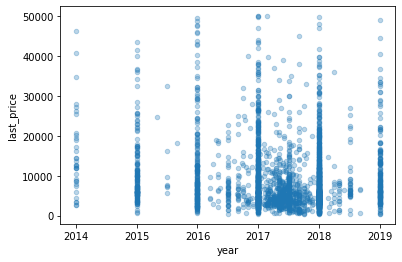

In [91]:
good_stat = (
    sorted_price_stat
    .merge(data, on='last_price')
    .pivot_table(index='last_price', values='year')
    .rename_axis('last_price')
    .reset_index()
)
good_stat.plot(x='year', y='last_price', kind='scatter', alpha=0.3)
data['last_price'].corr(data['year'])

Цена квартиры не зависит особо от года, в который объявление было выложено. В 2014 было мало объявлений, потому что в этот год был кризис

-0.07945601588964299

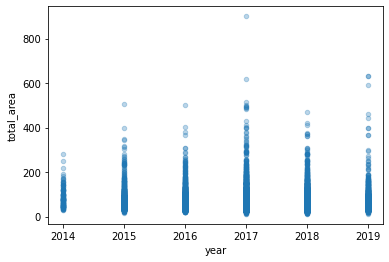

In [92]:
data.plot(x='year', y='total_area', kind='scatter', alpha=0.3)
data['total_area'].corr(data['year'])

Модуль корреляции 0.08, это мало, поэтому площадь продаваемых квартир не изменилась с годами. Но по графику заметно, что в 2014 площади квартир были ниже

**Выполним задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра."**

In [93]:
data1 = data.groupby('name_category')['meter_price'].median().rename_axis('locality_name').reset_index()


In [94]:
data2 = data.value_counts('name_category').rename_axis('locality_name').reset_index()

In [95]:
sort_meter_price = data2.merge(data1, on='locality_name')
sort_meter_price.head(10)

,locality_name,0,meter_price
0,Санкт-Петербург,15716,104761.905
1,Мурино,590,86175.644
2,Кудрово,472,95675.474
3,Шушары,440,76876.173
4,Всеволожск,398,65789.474
5,Пушкин,369,100000.000
6,Колпино,338,74723.748
7,Парголово,327,91642.857
8,Гатчина,307,67796.610
9,Выборг,237,58158.320


In [96]:
sort_meter_price.sort_values('meter_price', ascending=False).head(2)

,locality_name,0,meter_price
0,Санкт-Петербург,15716,104761.905
48,Зеленогорск,24,101666.667


Самая высокая стоимость одного квадратного метра в Санкт-Петербурге, но ненамного дороже этого значения в Зеленогорске, так как этот город находится на берегу Финского залива

In [97]:
sort_meter_price.sort_values('meter_price').head(1)

,locality_name,0,meter_price
177,Старополье,3,11000.000


Самая низкая стоимость одного квадратного метра в Старополье

**Выполненим задание: "Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра."**

In [98]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_center = (
    data_spb
    .groupby('cityCenters_nearest_km')['meter_price']
    .mean()
    .astype(int)
    .rename_axis('meter')
    .reset_index()
)
data_center['meter'] = data_center['meter'].astype(int)
data_center

,meter,meter_price
0,0,245833
1,1,177005
2,2,157849
3,3,121387
4,4,133282
5,5,140509
6,6,151012
7,7,156176
8,8,124875
9,9,113131


In [99]:
data_center['meter'].corr(data_center['meter_price'])

-0.7672666272970382

Корреляция 0.77, это говорит о высокой зависимости между показателями.

<AxesSubplot:title={'center':'Заголовок'}, xlabel='meter'>

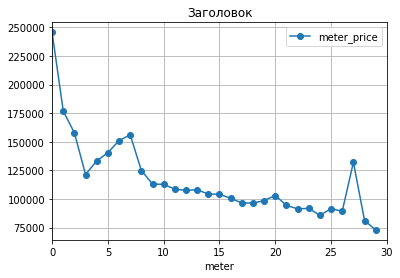

In [100]:
data_center.plot(x='meter', y='meter_price', style='o-', xlim=(0, 30), grid=True, title = 'Заголовок') 

Чем дальше от центра города, тем цена одного квадратного метра меньше. В радиусе 7 км от центра самые дорогие квартиры. Есть высокие значения на 27 км, но скорее это связано с другими факторами.

### Общий вывод

Таким образом, исследование прошло в несколько этапов:

1. Обзор данных.
2. Предобработка данных.
3. Добавление новых столбцов.
4. Исследование данных на наличие зависимостей разных факторов друг от друга

Цена квартиры на рынке недвижимости зависит от многих факторов. Интересные особенности, которые мне удалось обнаружить при выполнении проекта:
- В выходные реже всего выкладывают объявления
- В феврале рынок недвижимости наименее активен
- Есть достаточно много квартир, которые размещены более двух лет
- Чем больше площадь квартиры, тем цена выше
- Квартиры на последних этажах стоят дороже остальных
- В кризис число объявлений о продаже квартир падает
- В центральных густонаселенных и туристических городах цена квадратного метра выше всего
- Чем меньше растояние до центра города, тем выше цена одного квадратного метра

